## 분류 (Classification)
- 이진 분류와 다중 분류 
- 알고리즘 : Logistic Regression, 경사 하강법, 결정 트리(DecisionTree)

In [1]:
import pandas as pd

df = pd.read_csv("test2.csv")
df.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate'],
      dtype='object')

In [2]:
df.head().T # 변수들을 데이터프레임형태로 전부 보기 위해서 전치를 사용해 확인

,0,1,2,3,4
IsCanceled,0,0,0,0,0
LeadTime,342,737,7,13,14
ArrivalDateYear,2015,2015,2015,2015,2015
ArrivalDateMonth,July,July,July,July,July
ArrivalDateWeekNumber,27,27,27,27,27
ArrivalDateDayOfMonth,1,1,1,1,1
StaysInWeekendNights,0,0,0,0,0
StaysInWeekNights,0,0,1,1,2
Adults,2,2,1,1,2
Children,0,0,0,0,0


In [3]:
df.isnull().sum() # 결측치를 확인

# Country의 결측치를 확인할 수 있었다.

IsCanceled                       0
LeadTime                         0
ArrivalDateYear                  0
ArrivalDateMonth                 0
ArrivalDateWeekNumber            0
ArrivalDateDayOfMonth            0
StaysInWeekendNights             0
StaysInWeekNights                0
Adults                           0
Children                         0
Babies                           0
Meal                             0
Country                        464
MarketSegment                    0
DistributionChannel              0
IsRepeatedGuest                  0
PreviousCancellations            0
PreviousBookingsNotCanceled      0
ReservedRoomType                 0
AssignedRoomType                 0
BookingChanges                   0
DepositType                      0
Agent                            0
Company                          0
DaysInWaitingList                0
CustomerType                     0
ADR                              0
RequiredCarParkingSpaces         0
TotalOfSpecialReques

### Business Understanding
- 분야는? 숙박업
- 수익구조 (어떻게 호텔을 이용하는지, 절차?) or Business Logic? 
- 수익을 극대화하려면? Overbooking을 관리해주어야한다. 
- 유사한 분야는? 유사한 분야라는 것이 진짜 주제 테마? 이런것 뿐만 아니라 좀 크게크게 생각해보자.

### Data Understaing
- label : 예약 취소 여부
- feature : 나머지 컬럼 전부

### 경우의 수 column 처리
- Apply Domain Knowledge : 가장 우선적으로 column을 선정, 타당성을 잘 따져야한다. 가장 먼저 생각해야하는 방법
- Frequency Encoding : 빈도 비율을 따지자
- Target Encoding : 비추 방법, Label이 target이 되는 것을 잊지말자.
- One-hot Encoding : 아주 fm적인 방법이다. get_dummies()

In [4]:
set(df['Country'])

{'AGO',
 'ALB',
 'AND',
 'ARE',
 'ARG',
 'ARM',
 'AUS',
 'AUT',
 'AZE',
 'BDI',
 'BEL',
 'BGR',
 'BHR',
 'BHS',
 'BIH',
 'BLR',
 'BRA',
 'BWA',
 'CAF',
 'CHE',
 'CHL',
 'CHN',
 'CIV',
 'CMR',
 'CN',
 'COL',
 'COM',
 'CPV',
 'CRI',
 'CUB',
 'CYM',
 'CYP',
 'CZE',
 'DEU',
 'DJI',
 'DNK',
 'DOM',
 'DZA',
 'ECU',
 'EGY',
 'ESP',
 'EST',
 'FIN',
 'FJI',
 'FRA',
 'GBR',
 'GEO',
 'GGY',
 'GIB',
 'GRC',
 'HKG',
 'HRV',
 'HUN',
 'IDN',
 'IND',
 'IRL',
 'IRN',
 'ISL',
 'ISR',
 'ITA',
 'JAM',
 'JEY',
 'JOR',
 'JPN',
 'KAZ',
 'KOR',
 'KWT',
 'LBN',
 'LKA',
 'LTU',
 'LUX',
 'LVA',
 'MAC',
 'MAR',
 'MDG',
 'MDV',
 'MEX',
 'MKD',
 'MLT',
 'MOZ',
 'MUS',
 'MWI',
 'MYS',
 'NGA',
 'NLD',
 'NOR',
 'NPL',
 'NZL',
 'OMN',
 'PAK',
 'PER',
 'PHL',
 'PLW',
 'POL',
 'PRI',
 'PRT',
 'QAT',
 'ROU',
 'RUS',
 'SAU',
 'SEN',
 'SGP',
 'SMR',
 'SRB',
 'SUR',
 'SVK',
 'SVN',
 'SWE',
 'SYC',
 'SYR',
 'TGO',
 'THA',
 'TUN',
 'TUR',
 'TWN',
 'UGA',
 'UKR',
 'URY',
 'USA',
 'UZB',
 'VEN',
 'VNM',
 'ZAF',
 'ZMB',
 'ZWE',
 

In [5]:
df['Country'].value_counts()

PRT    17630
GBR     6814
ESP     3957
IRL     2166
FRA     1611
       ...  
BIH        1
MUS        1
COM        1
UGA        1
DJI        1
Name: Country, Length: 125, dtype: int64

In [6]:
set(df['Meal']) # value값에 공백이 존재

{'BB       ', 'FB       ', 'HB       ', 'SC       ', 'Undefined'}

In [7]:
mapper ={'SC       ': 0,
        'Undefined': 0,
        'BB       ' : 1,
        'HB       ' : 2,
        'FB       ' : 3}

df['day_stay'] = df['Meal'].map(mapper) # mapper 함수를 사용해서 Meal의 값을 숫자로 변경

In [8]:
df[['day_stay', 'Meal']].head()

,day_stay,Meal
0,1,BB
1,1,BB
2,1,BB
3,1,BB
4,1,BB


In [9]:
def local(x):             # 자국민과 타국민으로 분류하기 위해 함수를 만들어 적용
    if x == 'PRT':
        return 0
    else:
        return 1

df['Local_proposition'] = df['Country'].apply(lambda x : local(x))

<AxesSubplot:xlabel='Local_proposition', ylabel='IsCanceled'>

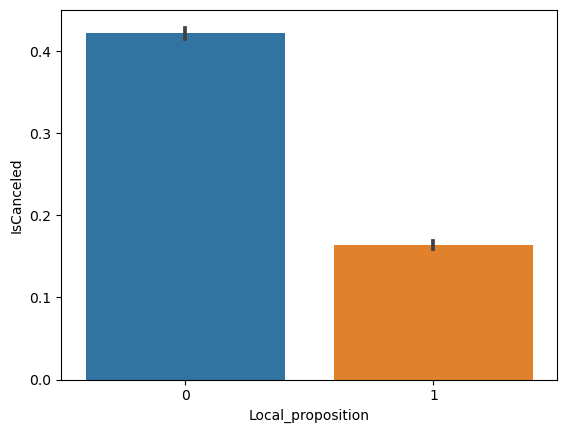

In [10]:
import seaborn as sns

sns.barplot(data = df, x = 'Local_proposition', y = 'IsCanceled')

In [11]:
# df['Foreigner'] = 1
# df.loc[df['Country'] == 'PRT', 'Foreigner'] = 0

In [12]:
df['Country'].value_counts(normalize = True).reset_index()

,index,Country
0,PRT,0.445247
1,GBR,0.172088
2,ESP,0.099934
3,IRL,0.054702
4,FRA,0.040686
...,...,...
120,BIH,0.000025
121,MUS,0.000025
122,COM,0.000025
123,UGA,0.000025


In [13]:
cr = pd.DataFrame(df['Country'].value_counts(normalize = True)).reset_index()
cr.columns = ['Country', 'Country_Ratio']
cr.head()

,Country,Country_Ratio
0,PRT,0.445247
1,GBR,0.172088
2,ESP,0.099934
3,IRL,0.054702
4,FRA,0.040686


In [14]:
df = pd.merge(df, cr) # 새로운 만든 데이터프레임과 원래 데이터프레임을 합침
df.head().T

,0,1,2,3,4
IsCanceled,0,0,0,0,1
LeadTime,342,737,0,9,85
ArrivalDateYear,2015,2015,2015,2015,2015
ArrivalDateMonth,July,July,July,July,July
ArrivalDateWeekNumber,27,27,27,27,27
ArrivalDateDayOfMonth,1,1,1,1,1
StaysInWeekendNights,0,0,0,0,0
StaysInWeekNights,0,0,2,2,3
Adults,2,2,2,2,2
Children,0,0,0,0,0


In [15]:
import numpy as np

# 나라별 취소율의 평균

df.groupby('Country').agg({'IsCanceled': np.mean}).reset_index() # 선입견, 고정관념이 들어갈 수 있다. 
# 표본이 적어서 오해를 하는 경우가 있을 수 있다. 
# 빈도수가 높은 경우에 필요에 따라 고정관념이 필요할 수도 있다. 

,Country,IsCanceled
0,AGO,0.291667
1,ALB,0.333333
2,AND,0.600000
3,ARE,0.727273
4,ARG,0.157895
...,...,...
120,VEN,0.333333
121,VNM,0.000000
122,ZAF,0.277778
123,ZMB,0.000000


In [16]:
# 한 row에서 경우의 수별로 column을 생성해서 맞는 값만 1로 나타내주는 방법이다.
# 다중 공선성
# column이 많을 시 one-hot encoding 방법을 사용할 때 어떻게 하면 더 좋은 방법으로 나타낼 수 있을까?

pd.get_dummies(df['Meal'])

,BB,FB,HB,SC,Undefined
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
39591,1,0,0,0,0
39592,1,0,0,0,0
39593,1,0,0,0,0
39594,1,0,0,0,0


In [17]:
sum(cr[ : 5]['Country_Ratio'])

0.8126578442266895

In [18]:
sum(cr[ -100:  ]['Country_Ratio'])

0.020507121931508172

In [19]:
top_5 = cr[:5]['Country'].values

In [20]:
def country_hot(country):
    if country in top_5:
        return country
    else:
        return 'other'

In [21]:
df['Country_Simple'] = df['Country'].apply(lambda x : country_hot(x))
set(df['Country_Simple'])

{'ESP', 'FRA', 'GBR', 'IRL', 'PRT', 'other'}

In [22]:
pd.get_dummies(df['Country_Simple']).T

,0,1,2,3,4,5,6,7,8,9,...,39586,39587,39588,39589,39590,39591,39592,39593,39594,39595
ESP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FRA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GBR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IRL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PRT,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
other,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [23]:
# 차를 가져오는 경우와 그렇지 않은 경우를 car_yes로 간단히 표현
def carNum(x):
    if x == 0:
        return 0
    else:
        return 1
df['car_yes'] = df['RequiredCarParkingSpaces'].apply(lambda x : carNum(x))

# df['car_yes'] = 0
# df.loc[df['RequiredCarParkingSpaces'] > 0, 'car_yes'] = 1

In [24]:
# 고객이 예약한 객실과 배정된 객실이 다를 때에 관한 정보를 추가

df['diff'] = (df['ReservedRoomType'] == df['AssignedRoomType'])
def diff(x):
    if x == True:
        return 0
    else:
        return 1
df['diff'] = df['diff'].apply(lambda x : diff(x))

# apply(lambda x : 0 if x[0] == x[1] else 1)

df.T

,0,1,2,3,4,5,6,7,8,9,...,39586,39587,39588,39589,39590,39591,39592,39593,39594,39595
IsCanceled,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LeadTime,342,737,0,9,85,75,23,35,37,37,...,130,130,130,130,130,130,130,130,130,0
ArrivalDateYear,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
ArrivalDateMonth,July,July,July,July,July,July,July,July,July,July,...,July,July,July,July,July,July,July,July,July,July
ArrivalDateWeekNumber,27,27,27,27,27,27,27,27,27,27,...,28,28,28,28,28,28,28,28,28,29
ArrivalDateDayOfMonth,1,1,1,1,1,1,1,1,1,1,...,9,9,9,9,9,9,9,9,9,18
StaysInWeekendNights,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,0
StaysInWeekNights,0,0,2,2,3,3,4,4,4,4,...,0,0,0,0,0,0,0,0,0,1
Adults,2,2,2,2,2,2,2,2,2,2,...,2,2,1,2,2,2,2,2,1,2
Children,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


<AxesSubplot:xlabel='diff', ylabel='IsCanceled'>

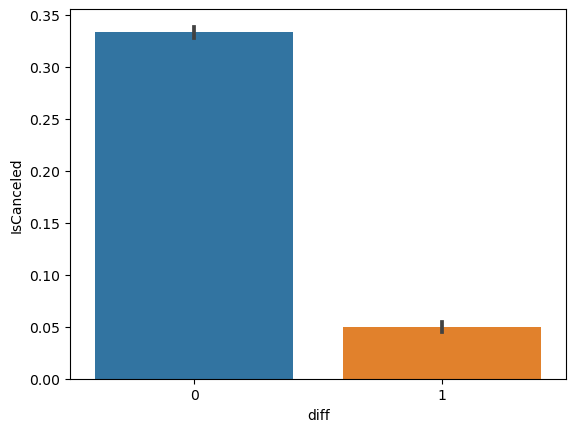

In [25]:
import seaborn as sns

sns.barplot(data = df, x = 'diff', y ='IsCanceled')

In [26]:
import numpy as np

np.mean(df['diff'])

0.18958985756136984

In [27]:
df.columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate',
       'day_stay', 'Local_proposition', 'Country_Ratio', 'Country_Simple',
       'car_yes', 'diff'],
      dtype='object')

In [28]:
interested = ['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate',
       'day_stay', 'Local_proposition', 'Country_Ratio', 'Country_Simple',
       'car_yes', 'diff']

df[interested].to_csv('test2_modify', index = False)

In [29]:
df.describe().columns

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'BookingChanges', 'DaysInWaitingList', 'ADR',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'day_stay',
       'Local_proposition', 'Country_Ratio', 'car_yes', 'diff'],
      dtype='object')

In [30]:
label = 'IsCanceled'

features =['LeadTime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'BookingChanges', 'DaysInWaitingList', 'ADR',
     'TotalOfSpecialRequests', 'day_stay',
       'Local_proposition', 'Country_Ratio', 'car_yes', 'diff']

In [31]:
df1 = pd.read_csv("test2_modify")
df1

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,day_stay,Local_proposition,Country_Ratio,Country_Simple,car_yes,diff
0,0,342,2015,July,27,1,0,0,2,0,...,0,0,Check-Out,2015-07-01,1,0,0.445247,PRT,0,0
1,0,737,2015,July,27,1,0,0,2,0,...,0,0,Check-Out,2015-07-01,1,0,0.445247,PRT,0,0
2,0,0,2015,July,27,1,0,2,2,0,...,0,0,Check-Out,2015-07-03,1,0,0.445247,PRT,0,0
3,0,9,2015,July,27,1,0,2,2,0,...,0,1,Check-Out,2015-07-03,3,0,0.445247,PRT,0,0
4,1,85,2015,July,27,1,0,3,2,0,...,0,1,Canceled,2015-05-06,1,0,0.445247,PRT,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39591,0,130,2017,July,28,9,2,0,2,0,...,0,1,Check-Out,2017-07-11,1,1,0.000303,other,0,0
39592,0,130,2017,July,28,9,2,0,2,0,...,0,1,Check-Out,2017-07-11,1,1,0.000303,other,0,0
39593,0,130,2017,July,28,9,2,0,2,0,...,0,1,Check-Out,2017-07-11,1,1,0.000303,other,0,0
39594,0,130,2017,July,28,9,2,0,1,0,...,0,1,Check-Out,2017-07-11,1,1,0.000303,other,0,0


In [32]:
from sklearn.ensemble import RandomForestRegressor as rf

train, test = df1[0::2], df1[1::2]
train, test = train.reset_index(), test.reset_index()

X_train, y_train = train[features], train[label]
X_test, y_test = test[features], test[label]

model = rf()
model.fit(X_train, y_train)

RandomForestRegressor()

In [33]:
fi = model.feature_importances_

In [34]:
DF = pd.DataFrame()
DF['features_name'] = features
DF['fi'] = fi
DF.sort_values(by = 'fi', ascending = False, ignore_index = True)

# 종속변수에 영향을 끼치는 순서를 데이터프레임을 통해 확인

,features_name,fi
0,LeadTime,0.252095
1,ADR,0.137437
2,car_yes,0.076356
3,ArrivalDateWeekNumber,0.073691
4,ArrivalDateDayOfMonth,0.069872
5,Country_Ratio,0.063957
6,Local_proposition,0.043427
7,StaysInWeekNights,0.040187
8,diff,0.040091
9,TotalOfSpecialRequests,0.034733


In [35]:
data = df1.groupby('LeadTime').agg({label: np.mean}).reset_index()

<AxesSubplot:xlabel='LeadTime', ylabel='IsCanceled'>

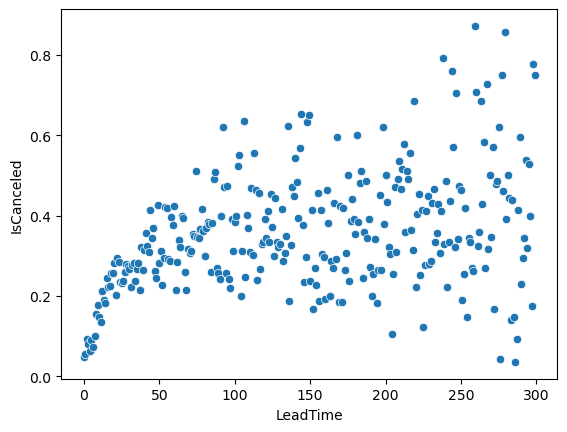

In [36]:
data = data.loc[data['LeadTime'] < 300]


sns.scatterplot(data= data, x='LeadTime', y ='IsCanceled')

<AxesSubplot:xlabel='LeadTime', ylabel='IsCanceled'>

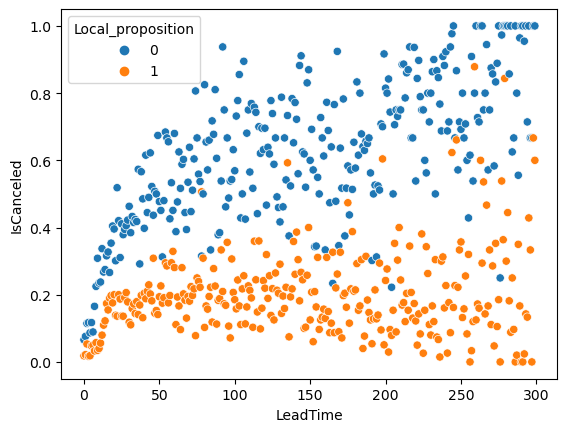

In [37]:
data = df1.groupby(['LeadTime', 'Local_proposition']).agg({label : np.mean}).reset_index()

data = data.loc[data['LeadTime'] < 300]


sns.scatterplot(data= data, x='LeadTime', y ='IsCanceled', hue = 'Local_proposition')

<AxesSubplot:xlabel='LeadTime', ylabel='IsCanceled'>

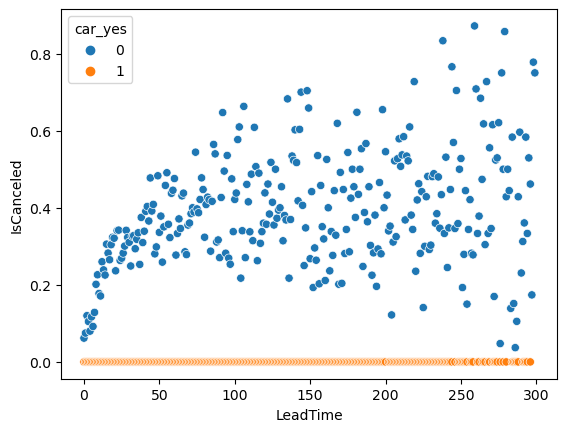

In [38]:
data = df1.groupby(['LeadTime', 'car_yes']).agg({label : np.mean}).reset_index()

data = data.loc[data['LeadTime'] < 300]


sns.scatterplot(data= data, x='LeadTime', y ='IsCanceled', hue = 'car_yes')

<AxesSubplot:xlabel='LeadTime', ylabel='IsCanceled'>

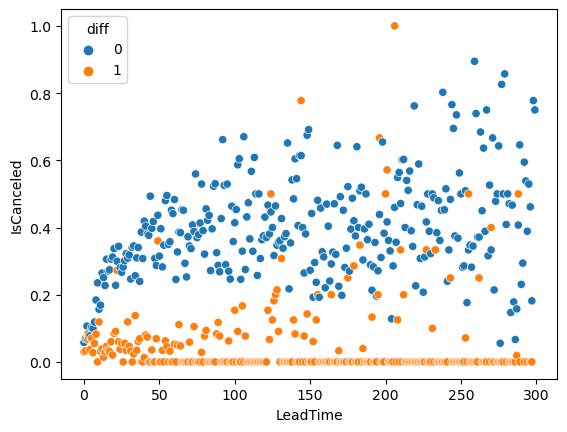

In [39]:
data = df1.groupby(['LeadTime', 'diff']).agg({label : np.mean}).reset_index()

data = data.loc[data['LeadTime'] < 300]


sns.scatterplot(data= data, x='LeadTime', y ='IsCanceled', hue = 'diff')

<AxesSubplot:xlabel='LeadTime', ylabel='IsCanceled'>

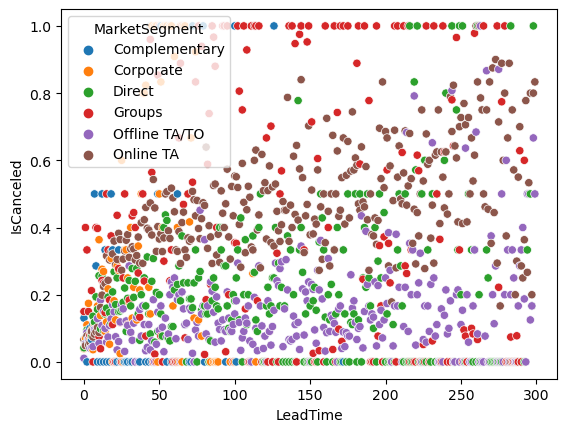

In [40]:
data = df1.groupby(['LeadTime', 'MarketSegment']).agg({label : np.mean}).reset_index()

data = data.loc[data['LeadTime'] < 300]


sns.scatterplot(data= data, x='LeadTime', y ='IsCanceled', hue = 'MarketSegment')

In [41]:
from sklearn.ensemble import RandomForestRegressor as rf

train, test = df1[0::2], df1[1::2]
train, test = train.reset_index(), test.reset_index()

X_train, y_train = train[features], train[label]
X_test, y_test = test[features], test[label]

from sklearn.tree import DecisionTreeClassifier as dt

In [42]:
model = dt(max_depth = 3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [43]:
from sklearn.tree import export_graphviz as eg

In [44]:
eg(model, out_file = 'tree.txt', feature_names= features, class_names = ['cancel_no','cancel_yes'])

In [45]:
# https://dreampuf.github.io/GraphvizOnline/

### Decision Tree 설명
- 박스 모양 : 노드, 맨 위 root node
- 첫째 줄 : 조건
- gini : 불순도를 나타냄, 섞여있는 정도, 목적이 분류, 
- samples : 현재 노드에서 학습에 사용된 row의 개수 
- value : 전체 row에 대해서 기준(label)에 대해서 2개로 나눈 값 
- class : 적힌 값이 정답률이 더 높다~~

### 지니계수
- yes_prob, no_prob
- A = yes_prob * ( 1 - yes_prob )
- B = no_prob * ( 1 - no_prob )
- A + B